### STEP 1: INITIALIZATION

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Import important libraries such as Tensorflow, Keras, Matlab plotting.**

In [4]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     --------------- ---------------------- 20.5/48.7 kB 320.0 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 610.7 kB/s eta 0:00:00
Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
   ---------------------------------------- 0.0/213.2 kB ? eta -:--:--
   ---------------------------------------- 213.2/213.2 kB 6.5 MB/s eta 0:00:00
Using cached namex-0.0.8-py3-none-any.whl (5.8 kB)
   ---------------------------------------- 0.0/292.0 kB ? eta -:--:--
   ---------------------------------------- 292.0/292.0 kB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel t

In [6]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.2/390.3 MB 6.6 MB/s eta 0:01:00
   ---------------------------------------- 0.6/390.3 MB 7.5 MB/s eta 0:00:53
   ---------------------------------------- 1.0/390.3 MB

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
# Importing libraries
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import display, Image # for displaying images
%matplotlib inline
import os

In [10]:
# Getting labels of training data
labels = os.listdir('C:/Users/DELL/Desktop/chaitanya/Train')
labels

['freshapples',
 'freshbanana',
 'freshbittergroud',
 'freshcapsicum',
 'freshcucumber',
 'freshokra',
 'freshoranges',
 'freshpotato',
 'freshtomato',
 'rottenapples',
 'rottenbanana']

Checking path: C:/Users/DELL/Desktop/chaitanya/Train/freshapples/

 FRESHAPPLES


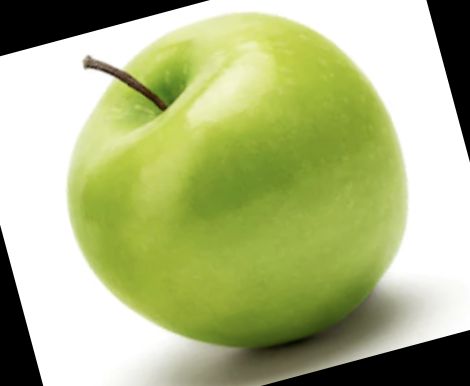

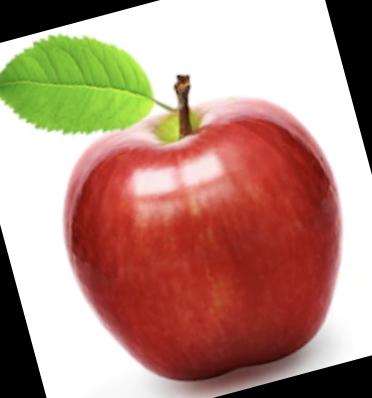

There are 2424 images in freshapples class
Checking path: C:/Users/DELL/Desktop/chaitanya/Train/rottenapples/

 ROTTENAPPLES


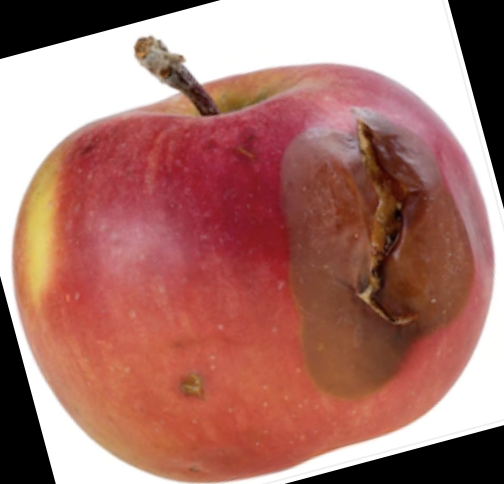

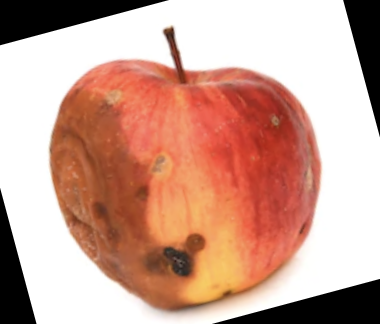

There are 3248 images in rottenapples class
Checking path: C:/Users/DELL/Desktop/chaitanya/Train/freshbanana/

 FRESHBANANA


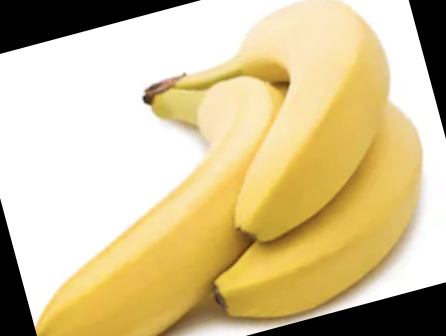

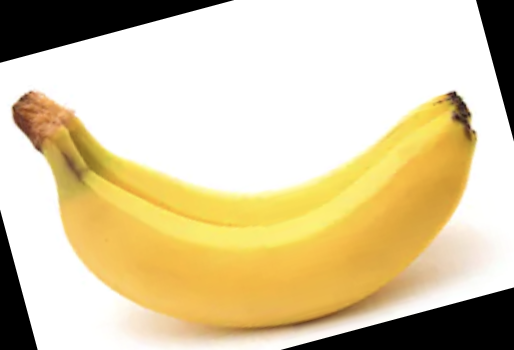

There are 2468 images in freshbanana class
Checking path: C:/Users/DELL/Desktop/chaitanya/Train/rottenbanana/

 ROTTENBANANA


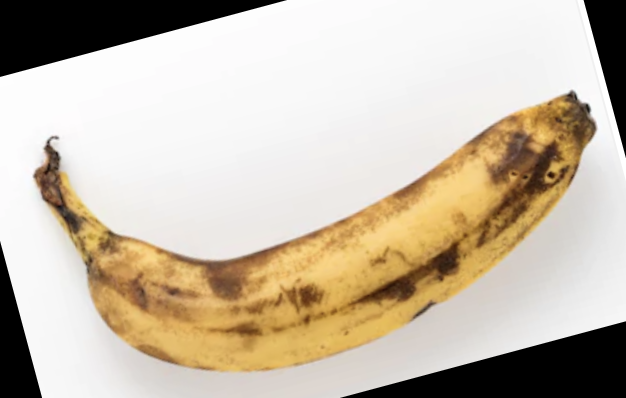

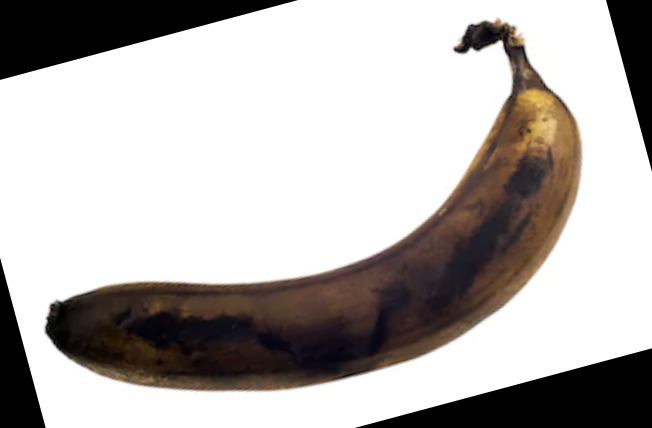

There are 2910 images in rottenbanana class


In [16]:
import os
from IPython.display import display, Image

# Define the labels
labels = ['freshapples', 'rottenapples', 'freshbanana', 'rottenbanana']

num = []

# Loop through the labels (class names)
for i in labels:
    path = f'C:/Users/DELL/Desktop/chaitanya/Train/{i}/'
    print(f"Checking path: {path}")  # Print the path being checked
    
    # Check if the directory exists
    if os.path.exists(path):
        folder_data = os.listdir(path)
        k = 0
        print('\n', i.upper())
        for j in folder_data:
            if k < 2:  # Display the first 2 images
                display(Image(path + j))
            k += 1
        num.append(k)
        print('There are', k, 'images in', i, 'class')
    else:
        print(f"Directory not found: {path}")


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

tg = datagen.flow_from_directory(
    directory='C:/Users/DELL/Desktop/chaitanya/Train', 
    target_size=(20, 20), 
    classes=labels, 
    batch_size=25, 
    subset='training'
)

vg = datagen.flow_from_directory(
    directory='C:/Users/DELL/Desktop/chaitanya/Train', 
    target_size=(20, 20), 
    classes=labels, 
    batch_size=25, 
    subset='validation'
)


Found 8842 images belonging to 4 classes.
Found 2208 images belonging to 4 classes.


### STEP 3: Build our Convolutional Neural Network

In [26]:
from tensorflow.keras import layers, models

model = models.Sequential()

# Use Input layer instead of input_shape in the first Conv2D layer
model.add(layers.Input(shape=(20, 20, 3)))  # Specify the input shape as the first layer
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(4, activation='softmax'))


**Compile model.**

In [27]:
# Compile model
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

**Summary of our model**

In [28]:
model.summary(line_length=None, positions=None, print_fn=None)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 18, 18, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 9, 9, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,276 (430.77 KB)

 Trainable params: 110,276 (430.77 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Train model
history = model.fit(
    x=tg, 
    steps_per_epoch=len(tg), 
    epochs=8, 
    validation_data=vg, 
    validation_steps=len(vg)
)


Epoch 1/8
354/354 ━━━━━━━━━━━━━━━━━━━━ 34s 97ms/step - accuracy: 0.9619 - loss: 0.0972 - val_accuracy: 0.9855 - val_loss: 0.0459
Epoch 2/8
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 112us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/8
354/354 ━━━━━━━━━━━━━━━━━━━━ 34s 97ms/step - accuracy: 0.9705 - loss: 0.0735 - val_accuracy: 0.9887 - val_loss: 0.0329
Epoch 4/8
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 120us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/8
354/354 ━━━━━━━━━━━━━━━━━━━━ 34s 97ms/step - accuracy: 0.9752 - loss: 0.0631 - val_accuracy: 0.9769 - val_loss: 0.0681
Epoch 6/8
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 110us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/8
354/354 ━━━━━━━━━━━━━━━━━━━━ 34s 97ms/step - accuracy: 0.9761 - loss: 0.0645 - val_accuracy: 0.9651 - val_loss: 0.1083
Epoch 8/8
354/354 ━━━━━━━━━━━━━━━━━━━━ 0s 142us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


### STEP 4: SHOW IMPORTANT PLOTS

**Plot Accuracy over epochs plot(Higher over time is better)**

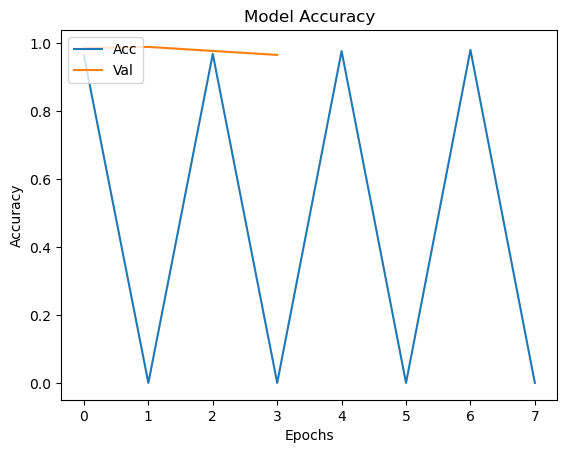

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')

**Plot Loss over epochs plot. (Lower over time is better)**

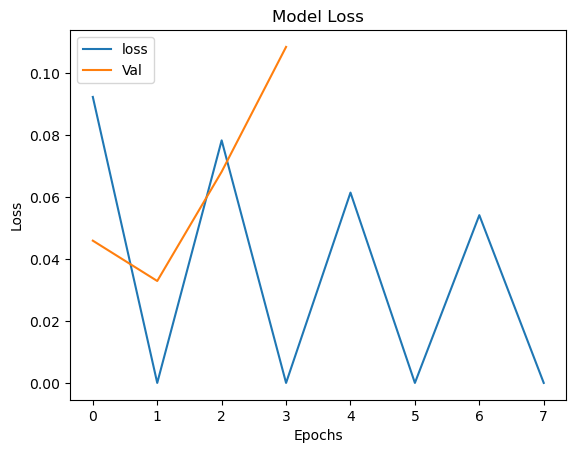

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper left')

**STEP 5: Test our model**

In [33]:
test_set = datagen.flow_from_directory(directory='C:/Users/DELL/Desktop/chaitanya/Test', target_size=(20,20), classes=labels, batch_size=25, subset='validation')

Found 713 images belonging to 4 classes.


In [34]:
prediction = model.predict(test_set)

29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 272ms/step


In [35]:
prediction

array([[1.8466380e-07, 1.7870184e-04, 9.7574323e-01, 2.4077781e-02],
       [1.0801393e-05, 1.9975994e-06, 9.9996316e-01, 2.3934292e-05],
       [9.9992776e-01, 7.2123461e-05, 1.2118993e-07, 1.7800816e-10],
       ...,
       [1.3023975e-02, 9.8697597e-01, 1.0287285e-08, 1.5702728e-08],
       [9.9671364e-01, 2.3995051e-03, 8.8684587e-04, 5.4222443e-08],
       [9.9995434e-01, 4.5703331e-05, 4.6349789e-13, 1.9699840e-13]],
      dtype=float32)

In [40]:
from tensorflow.keras.preprocessing import image
import numpy as np

def classify_image(image_path, model):
    # Set the image dimensions
    img_height, img_width = 20, 20

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    # Make predictions
    predictions = model.predict(img_array)
    class_names = ['freshapples', 'rottenapples', 'freshbanana', 'rottenbanana']  # Update class names accordingly
    predicted_class = class_names[np.argmax(predictions)]
    
    print(f"Predicted class: {predicted_class}")

# Example usage
image_path = r"C:/Users/DELL/Downloads/rotten_banana.jpg"  # Update this path to your image
classify_image(image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class: rottenbanana
